In [1]:
import random
import folium

import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import geopandas as gpd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature

from cartopy.io import shapereader

In [2]:
df_cad = pd.read_csv("./data/BD_Linhas-de-Transmissão(Cadastro).csv", encoding='latin-1', sep=';')
df_camp = pd.read_csv("./data/BD_Linhas-de-Transmissão(Campos).csv", encoding='latin-1', sep=';')
df_docs = pd.read_csv("./data/BD_Linhas-de-Transmissão(Documentos de Medição).csv", encoding='latin-1', sep=';')

In [3]:
df_cad.head()

Equipamento Linha de Transmissão Denominação Dt.entr.serviço  \
0       115280                 LT31   Torre 111             NaN   
1       115281                 LT31   Torre 112             NaN   
2       115282                 LT31   Torre 113             NaN   
3       115283                 LT31   Torre 114             NaN   
4       115284                 LT31   Torre 115             NaN   

             Classe Código ABC  Tensão     Latitude    Longitude  
0  L_TORRE_AUTOPORT          C     230  -22,9776099  -50,0565232  
1  L_TORRE_AUTOPORT          C     230  -22,9791718  -50,0531681  
2  L_TORRE_AUTOPORT          C     230  -22,9808738  -50,0494992  
3  L_TORRE_AUTOPORT          C     230  -22,9830172  -50,0449193  
4  L_TORRE_AUTOPORT          C     230  -22,9846747  -50,0413489

In [4]:
df_campos_medicao = df_camp[['Planilha Documentos de Medição', 'Unnamed: 4']]
new_header = df_campos_medicao.iloc[0]
df_campos_medicao = df_campos_medicao[1:]
df_campos_medicao.columns = new_header

df_campos_medicao

0            Coluna                                  Significado
1       Equipamento                      Identificador do objeto
2     Ponto medição            Identificador do ponto de medição
3       Doc.medição        Identificador do documento de medição
4              Data                       Data do ensaio/medição
5      Item medição  Posição da estrutura onde é feita a medição
6     Valor teórico                       Valor teórico esperado
7     LimInfIntMed.                     Limite inferior esperado
8     LimSupIntMed.                     Limite superior esperado
9   ValMed/PosTCont                                 Valor medido
10   Unid.caracter.                           Unidade de medição
11  Cód.valorização                        Catálogo de respostas
12  Txt.code codif.                                     Resposta
13      Denominação              Denominação do ponto de medição
14            Texto                                  Comentários

In [5]:
df_campos_cadastro = df_camp[['Planilha Cadastro', 'Unnamed: 1']]

new_header = df_campos_cadastro.iloc[0]
df_campos_cadastro = df_campos_cadastro[1:-5]
df_campos_cadastro.columns = new_header

df_campos_cadastro

0                Coluna                            Significado
1           Equipamento                Identificador do objeto
2  Linha de Transmissão  Identificador da linha de transmissão
3           Denominação                    Descrição do objeto
4       Dt.entr.serviço            Data de entrada em operação
5                Classe                    Tipo do equipamento
6            Código ABC                            Criticidade
7                Tensão            Nível de tensão de operação
8              Latitude                    Latitude geográfica
9             Longitude                   Longitude geográfica

In [6]:
aux = df_cad[['Equipamento', 'Linha de Transmissão']]
df_docs = df_docs.merge(aux, on='Equipamento')

df_docs['Ano'] = df_docs['Data'].apply(lambda x: x.split("/")[-1])

df_docs.head()

Equipamento  Ponto medição  Doc.medição        Data Item medição  \
0       323958       10155659      7991396  18/02/2025          VÃO   
1       323957       10155490      7991397  18/02/2025          VÃO   
2       323957       10155491      7991398  18/02/2025          VÃO   
3       323955       10155322      7991399  18/02/2025          VÃO   
4       323954       10155155      7991400  18/02/2025          VÃO   

  Valor teórico LimInfIntMed. LimSupIntMed. ValMed/PosTCont Unid.caracter.  \
0          0,00          0,00        100,00        1.500,00             m2   
1          0,00          0,00        100,00        5.400,00             m2   
2          0,00          0,00        100,00        3.600,00             m2   
3          0,00          0,00        100,00        6.000,00             m2   
4          0,00          0,00        100,00       10.350,00             m2   

   Cód.valorização    Txt.code codif.        Denominação  \
0              3.0         FIM DO VAO  ROCADA MECANIZADA   
1              1.0      INICIO DO VAO      ROCADA MANUAL   
2              5.0  MEIO E FIM DO VAO  ROCADA MECANIZADA   
3              5.0  MEIO E FIM DO VAO      ROCADA MANUAL   
4              7.0       VAO COMPLETO  ROCADA MECANIZADA   

                                      Texto Linha de Transmissão   Ano  
0  Roçada mecanizada no final do vão 50x30.                LT615  2025  
1  Roçada manual no início do vão 180x30. R                LT615  2025  
2  Roçada mecanizada no meio e fim do vão 1                LT615  2025  
3  Roçada manual no meio e fim do vão 200x3                LT615  2025  
4  Roçada mecanizada vão total 345x30.  Rel                LT615  2025

In [8]:
df_docs[df_docs['Denominação'] == "Qualificacao do Equipamento"].tail()

Equipamento  Ponto medição  Doc.medição        Data Item medição  \
344275       102929        4490236       594410  05/10/2018        TORRE   
344277       101848        4229236      7670932  10/12/2024        TORRE   
344278       101848        4229236      4549684  28/02/2023        TORRE   
344279       101848        4229236      1919434  02/06/2020        TORRE   
344284       101818        4479736       594158  05/10/2018        TORRE   

       Valor teórico LimInfIntMed. LimSupIntMed. ValMed/PosTCont  \
344275           NaN           NaN           NaN            9,00   
344277           NaN           NaN           NaN            5,00   
344278           NaN           NaN           NaN            4,00   
344279           NaN           NaN           NaN            5,00   
344284           NaN           NaN           NaN            9,00   

       Unid.caracter.  Cód.valorização Txt.code codif.  \
344275             UN              NaN             NaN   
344277             UN              NaN             NaN   
344278             UN              NaN             NaN   
344279             UN              NaN             NaN   
344284             UN              NaN             NaN   

                        Denominação                                     Texto  \
344275  Qualificacao do Equipamento                                       NaN   
344277  Qualificacao do Equipamento          D:0*1/ 0*2/ 0*3/ 0*4/ 3*5/ 164*9   
344278  Qualificacao do Equipamento  ROÇADA MANUAL. D:0*1/ 0*2/ 0*3/ 1*4/ 2*5   
344279  Qualificacao do Equipamento          D:0*1/ 0*2/ 0*3/ 0*4/ 2*5/ 165*9   
344284  Qualificacao do Equipamento                                       NaN   

       Linha de Transmissão   Ano  
344275               LT3235  2018  
344277               LT3235  2024  
344278               LT3235  2023  
344279               LT3235  2020  
344284               LT3235  2018

# Analise Exploratoria

In [12]:
df_cad['Latitude'] = df_cad['Latitude'].apply(lambda x: x.replace(',', '.'))
df_cad['Longitude'] = df_cad['Longitude'].apply(lambda x: x.replace(',', '.'))

df_cad['Latitude'] = pd.to_numeric(df_cad['Latitude'], errors='coerce')
df_cad['Longitude'] = pd.to_numeric(df_cad['Longitude'], errors='coerce')

In [63]:
from branca.element import Figure
fig = Figure(width=600, height=400)

df = df_cad[~df_cad['Latitude'].isna()]

grupos = df.groupby('Linha de Transmissão')

colors = {}

m = folium.Map(location=([-23.533773, -46.625290]))
# folium.TileLayer('cartodbdark_matter').add_to(m)

for nome_linha, grupo in list(grupos)[:80]:
    grupo = grupo.reset_index(drop=True)

    if nome_linha not in colors:
        colors[nome_linha] =  f"#{random.randint(0, 0xFFFFFF):06x}"
    
    for idx in range(1, len(grupo)):

        origin = grupo.loc[idx-1, :]
        destination = grupo.loc[idx, :]

        folium.CircleMarker([origin['Latitude'], origin['Longitude']],
                        radius=2, color=colors[nome_linha],
                        fill_color=colors[nome_linha], # divvy color
                       ).add_to(m)

    folium.CircleMarker([destination['Latitude'], destination['Longitude']],
                        radius=2, color=colors[nome_linha],
                        fill_color=colors[nome_linha], # divvy color
                    ).add_to(m)

fig.add_child(m)

In [ ]:
import branca
# aux_data = (df_docs.groupby('Equipamento', as_index = False)['Denominação'].count()/)#.sort_values(ascending=False)

inspecoes = df_docs.groupby('Equipamento', as_index = False)['Denominação'].count()
anos = df_docs.groupby('Equipamento', as_index = False)['Ano'].nunique()

# df_cad.merge()
inspecoes = inspecoes.merge(anos, on='Equipamento')
inspecoes['Taxa'] = inspecoes["Denominação"]/inspecoes['Ano']

aux_cad = df_cad.merge(inspecoes, on='Equipamento')

aux_cad['above_threshold'] = aux_cad['Taxa'] > 7



fig = Figure(width=600, height=400)

df = aux_cad[~aux_cad['Latitude'].isna()]
df = df[df['above_threshold'] == True]

grupos = df.groupby('Linha de Transmissão')

colors = {
    True: '#ff0000',
    False: '#0062ff'
}

m = folium.Map(location=([-23.533773, -46.625290]))
# folium.TileLayer('cartodbdark_matter').add_to(m)



for nome_linha, grupo in list(grupos)[:]:
    grupo = grupo.reset_index(drop=True)

    if nome_linha not in colors:
        colors[nome_linha] =  f"#{random.randint(0, 0xFFFFFF):06x}"
    
    for idx in range(1, len(grupo)):

        origin = grupo.loc[idx-1, :]
        destination = grupo.loc[idx, :]

        folium.CircleMarker([origin['Latitude'], origin['Longitude']],
                        radius=2, color=colors[origin['above_threshold']],
                        fill_color=colors[origin['above_threshold']], # divvy color
                       ).add_to(m)

    folium.CircleMarker([destination['Latitude'], destination['Longitude']],
                        radius=2, color=colors[destination['above_threshold']],
                        fill_color=colors[destination['above_threshold']], # divvy color
                    ).add_to(m)



fig.add_child(m)


In [176]:
inspecoes_motivo = df_docs.groupby('Equipamento', as_index = False)['Denominação'].agg(pd.Series.mode)
inspecoes = df_docs.groupby('Equipamento', as_index = False)['Denominação'].count()
anos = df_docs.groupby('Equipamento', as_index = False)['Ano'].nunique()

# df_cad.merge()
inspecoes = inspecoes.merge(anos, on='Equipamento')
inspecoes['Taxa'] = inspecoes["Denominação"]/inspecoes['Ano']

aux_cad = df_cad.merge(inspecoes, on='Equipamento')
aux_cad = aux_cad.merge(inspecoes_motivo, on='Equipamento')


aux_cad['above_threshold'] = aux_cad['Taxa'] >= 6



fig = Figure(width=1200, height=1000)

df = aux_cad[~aux_cad['Latitude'].isna()]
df = df[df['above_threshold'] == True]

grupos = df.groupby('Linha de Transmissão')

colors = {
}

selected_cat = ['BASE SUJA', 'Qualificacao do Equipamento', 'GRAMPO DE ANCORAGEM CONDUTOR (DIR/UNI)', 'CORROSAO', 'JUMPER (DIR/UNI)', 'DISTANCIA DO CABO A VEGETACAO', 'CABO CONDUTOR (DIR/UNI)', 'INVASAO', 'ESPACADOR (ESQ)', 'ESFERA (DIR/UNI)', 'ESTREITAMENTO DA FAIXA', 'BASE ALAGADA', 'NINHO DE PÁSSARO', 'FERRAGENS/CONECTORES PARA-RAIO (DIR/UNI)', 'CABO PARA-RAIO (DIR/UNI)', 'PLACA', 'ISOL - MEIO/INTER (CIRC DIR/UNI)', 'ENTULHO', 'ISOL - INF/DIR/EXTER(CIRC ESQ)', 'CABO PARA-RAIO (ESQ)']

m = folium.Map(location=([-23.533773, -46.625290]))
folium.TileLayer('cartodbdark_matter').add_to(m)

for nome_linha, grupo in list(grupos)[:]:
    grupo = grupo.reset_index(drop=True)

    if nome_linha not in colors:
        colors[nome_linha] =  f"#{random.randint(0, 0xFFFFFF):06x}"
    
    for idx in range(1, len(grupo)):

        origin = grupo.loc[idx-1, :]
        destination = grupo.loc[idx, :]

        for i in origin['Denominação']:
            if i in selected_cat:
                continue
            if "COR " in i or "CORRO" in i:
                origin['Denominação'][0] = "CORROSAO"
        
        for i in destination['Denominação']:
            if i in selected_cat:
                continue
            if "COR " in i or "CORRO" in i:
                destination['Denominação'][0] = "CORROSAO"


        if origin['Denominação'][0] not in colors:
            colors[origin['Denominação'][0]] =  f"#{random.randint(0, 0xFFFFFF):06x}"

        if destination['Denominação'][0] not in colors:
            colors[destination['Denominação'][0]] =  f"#{random.randint(0, 0xFFFFFF):06x}"

        folium.CircleMarker([origin['Latitude'], origin['Longitude']],
                        radius=3, color=colors[origin['Denominação'][0]],
                        fill_color=colors[origin['Denominação'][0]],
                        popup=origin['Denominação'][:2]
                       ).add_to(m)

    folium.CircleMarker([destination['Latitude'], destination['Longitude']],
                        radius=3, color=colors[destination['Denominação'][0]],
                        fill_color=colors[destination['Denominação'][0]],
                        popup=destination['Denominação'][:2]
                    ).add_to(m)

colors = {k:v for k,v in colors.items() if k in selected_cat}
legends = [f'&nbsp; <i class="fa fa-circle" style="color:{colors[i]}"></i> {i.lower()} &nbsp; <br>' for i in sorted(colors)]

legend_html = '''
{% macro html(this, kwargs) %}
<div style="position: fixed; 
     bottom: 50px; left: 50px; width: 300px; height: 450px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     background-color:white; opacity: 0.85;">
     &nbsp; <b>Legend</b> <br>'''+" ".join(legends)+'''     
</div>
{% endmacro %}
'''

legend = branca.element.MacroElement()
legend._template = branca.element.Template(legend_html)


fig.add_child(m)
fig.add_child(legend)


m

Text(0.5, 0, 'Quantidade de Inspeção por Categoria')

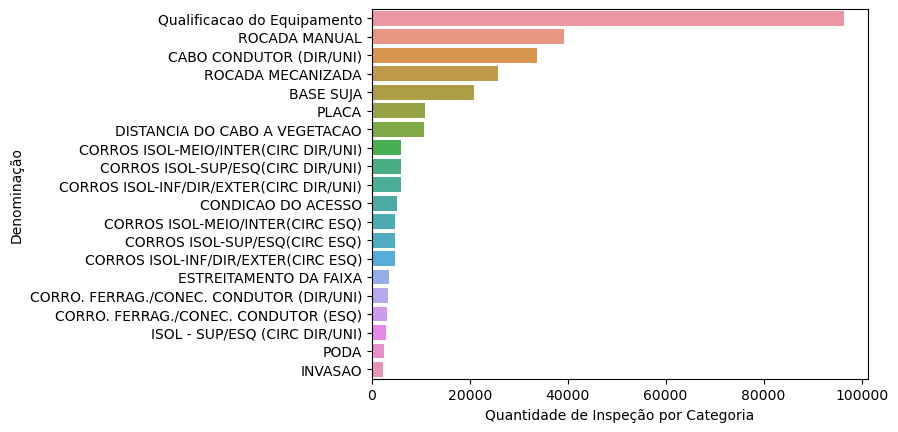

In [62]:
aux_data = df_docs['Denominação'].value_counts()[:20]

plt.title("")

sns.barplot(
    y=aux_data.index,
    x=aux_data.values, orient='h'
)

plt.xlabel("Quantidade de Inspeção por Categoria")
plt.show()

Text(0, 0.5, 'Quantidade de Linhas de Transmissão')

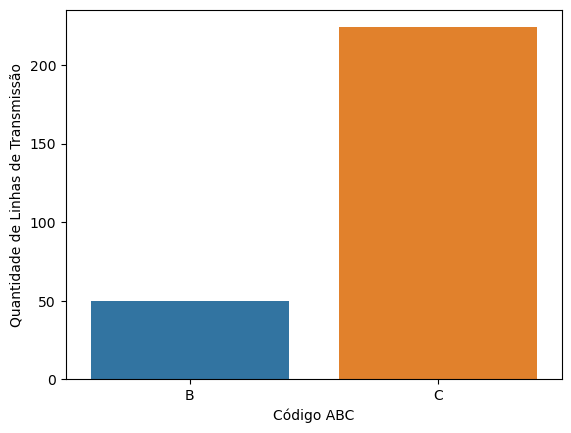

In [46]:
aux_data = df_cad.groupby('Código ABC')['Linha de Transmissão'].nunique()

sns.barplot(
    x=aux_data.index,
    y=aux_data.values
)
plt.ylabel("Quantidade de Linhas de Transmissão")
plt.show()

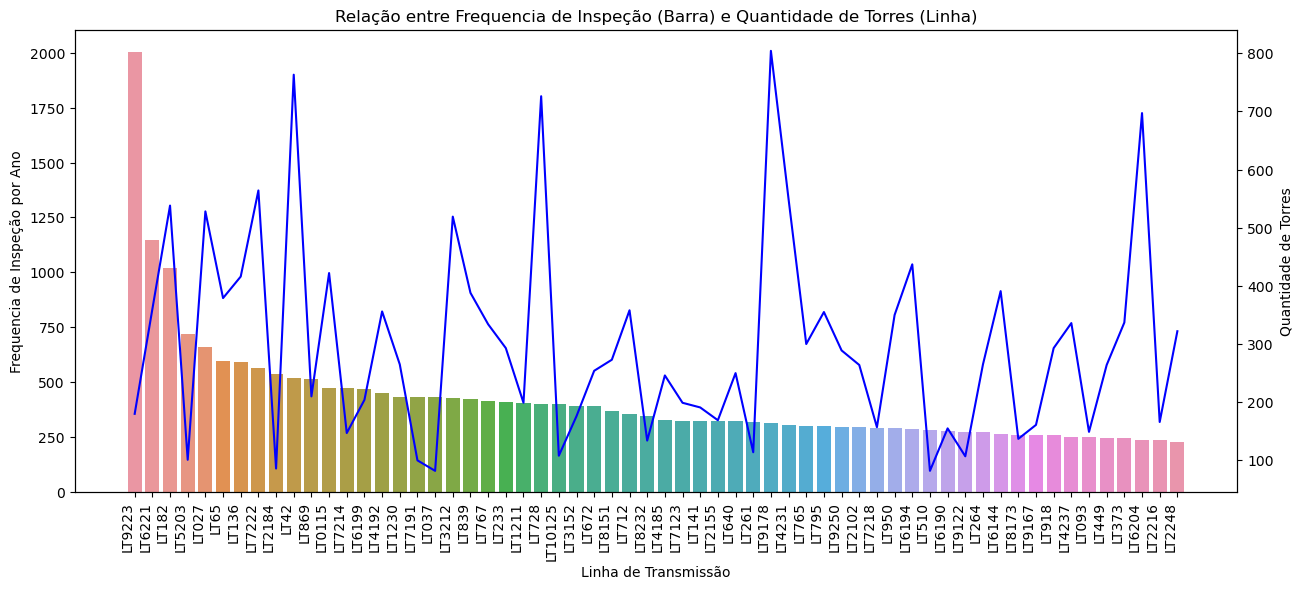

In [33]:

aux_data = (df_docs.groupby('Linha de Transmissão')['Denominação'].count()/df_docs.groupby('Linha de Transmissão')['Ano'].nunique()).sort_values(ascending=False)[:60]

aux_cad = df_cad[df_cad['Linha de Transmissão'].isin(aux_data.index)]
aux_cad = aux_cad.groupby('Linha de Transmissão')['Denominação'].nunique()

plt.figure(figsize=(15, 6))

sns.barplot(
    x=aux_data.index,
    y=aux_data.values
)

plt.title("Relação entre Frequencia de Inspeção (Barra) e Quantidade de Torres (Linha)")

plt.ylabel("Frequencia de Inspeção por Ano")
plt.xticks(rotation=90, ha='right')

ax2 = plt.twinx()
sns.lineplot(x=aux_cad.index, y=aux_cad.values, color="b", ax=ax2, markers='x')
plt.ylabel("Quantidade de Torres")


plt.show()
